In [1]:
from datasets import load_dataset

ds = load_dataset("coastalcph/lex_glue", "ledgar")

/Users/huggingfaceit/code/lextral/backend/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# explore train
print(ds["train"][0]['text'])

Except as otherwise set forth in this Debenture, the Company, for itself and its legal representatives, successors and assigns, expressly waives presentment, protest, demand, notice of dishonor, notice of nonpayment, notice of maturity, notice of protest, presentment for the purpose of accelerating maturity, and diligence in collection.


In [3]:
print(ds["train"][0]['label'])

97


In [4]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 10000
    })
})

In [5]:
label_names = ds["train"].features["label"].names
len(label_names)

100

In [6]:
# number of el for each label
from collections import Counter

label_counts = Counter(ds["train"]["label"])
print(label_counts)

Counter({47: 3167, 65: 2493, 26: 2427, 38: 2340, 79: 1808, 85: 1469, 2: 1467, 7: 1327, 41: 1224, 89: 1166, 88: 1112, 51: 1104, 87: 1089, 58: 1034, 20: 1012, 45: 1009, 46: 976, 19: 960, 49: 936, 97: 878, 92: 866, 68: 856, 96: 768, 61: 741, 43: 677, 75: 664, 11: 656, 74: 621, 10: 620, 31: 590, 13: 588, 48: 587, 42: 578, 76: 569, 29: 566, 83: 563, 9: 549, 18: 541, 99: 517, 98: 499, 59: 479, 53: 473, 24: 469, 33: 462, 67: 459, 95: 451, 63: 445, 84: 444, 22: 444, 16: 434, 80: 419, 66: 409, 23: 406, 12: 397, 15: 389, 55: 386, 6: 385, 86: 380, 54: 366, 64: 363, 28: 354, 32: 354, 91: 353, 4: 352, 17: 349, 71: 345, 93: 341, 62: 327, 77: 327, 81: 326, 0: 326, 39: 324, 73: 323, 90: 317, 57: 313, 35: 308, 52: 304, 44: 300, 27: 278, 50: 271, 30: 263, 40: 258, 60: 255, 1: 252, 36: 244, 82: 238, 34: 229, 56: 202, 37: 201, 69: 190, 5: 178, 21: 175, 25: 168, 94: 131, 70: 125, 78: 118, 3: 106, 72: 47, 8: 31, 14: 23})


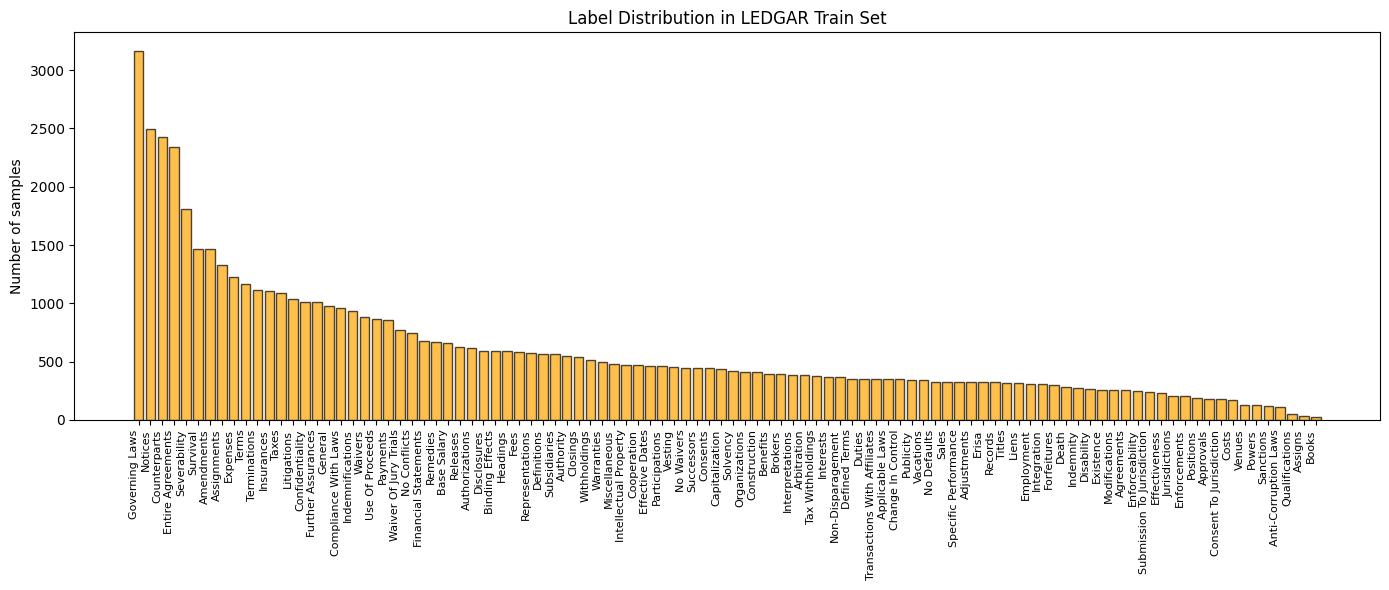

In [10]:
import matplotlib.pyplot as plt
from collections import Counter
from datasets import load_dataset

# Charger le dataset
ds = load_dataset("lex_glue", "ledgar")
label_counts = Counter(ds["train"]["label"])

# Récupérer les noms de labels textuels
label_names = ds["train"].features["label"].names
labels = list(label_counts.keys())
counts = [label_counts[label] for label in labels]
names = [label_names[label] for label in labels]

# Trier par fréquence décroissante
sorted_data = sorted(zip(names, counts), key=lambda x: x[1], reverse=True)
sorted_names, sorted_counts = zip(*sorted_data)

# Plot
plt.figure(figsize=(14, 6))
bars = plt.bar(sorted_names, sorted_counts, color='orange', edgecolor='black', alpha=0.7)
plt.xticks(rotation=90, ha="right", fontsize=8)
plt.ylabel("Number of samples")
plt.title("Label Distribution in LEDGAR Train Set")
plt.tight_layout()
plt.savefig("../images/label_distribution_ledgar.png", dpi=300)
plt.show()


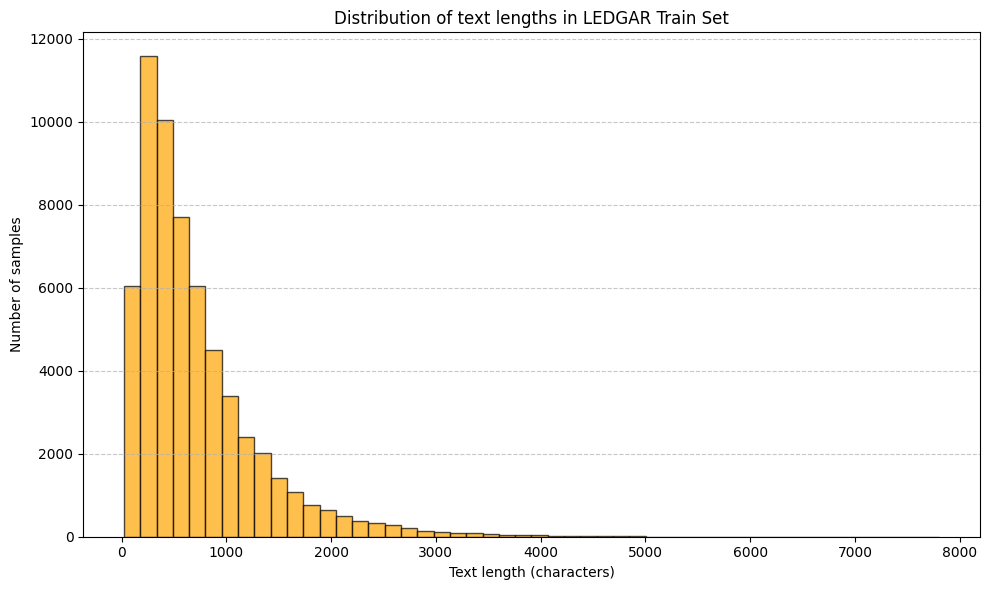

In [11]:
import matplotlib.pyplot as plt
from datasets import load_dataset

# Charger le dataset
ds = load_dataset("lex_glue", "ledgar")

# Calculer la longueur des textes en nombre de caractères
text_lengths = [len(t) for t in ds["train"]["text"]]

# Plot histogramme
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel("Text length (characters)")
plt.ylabel("Number of samples")
plt.title("Distribution of text lengths in LEDGAR Train Set")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("../images/text_length_distribution_ledgar.png", dpi=300)
plt.show()


True
True
Connecting to PostgreSQL at localhost:5433/lextral-db as postgres
Loaded embeddings: (1000, 1024)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.264481
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.393417
[t-SNE] KL divergence after 1000 iterations: 0.937205


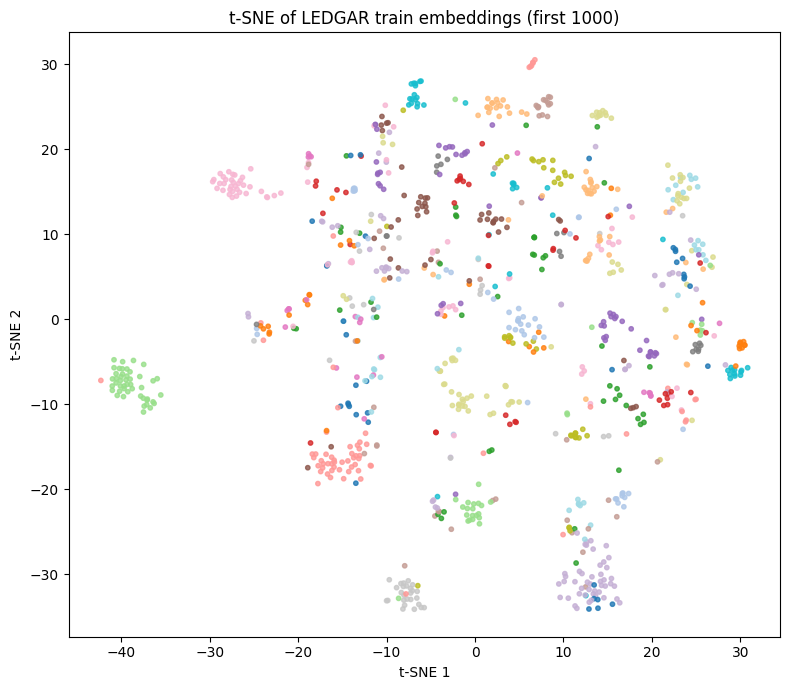

In [ ]:
import os
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from pgvector.psycopg2 import register_vector
from dotenv import load_dotenv
print(load_dotenv("../.env"))
print(load_dotenv("../secrets.env"))

PG_HOST = os.getenv("DB_HOST", "127.0.0.1")
PG_PORT = "5433"
PG_DB   = os.getenv("DB_NAME", "lextral-db")
PG_USER = os.getenv("DB_USER", "postgres")
PG_PASS = os.getenv("DB_PASSWORD", "")

print(f"Connecting to PostgreSQL at {PG_HOST}:{PG_PORT}/{PG_DB} as {PG_USER}")
conn = psycopg2.connect(
    host=PG_HOST, port=PG_PORT, dbname=PG_DB, user=PG_USER, password=PG_PASS
)
register_vector(conn)

query = """
SELECT id, label_id, label_text, text, embedding
FROM clause_embeddings
WHERE split = 'train'
ORDER BY id
LIMIT 1000;
"""

with conn.cursor() as cur:
    cur.execute(query)
    rows = cur.fetchall()

conn.close()

# rows[i] = (id, label_id, label_text, text, embedding)
ids        = [r[0] for r in rows]
label_ids  = np.array([r[1] for r in rows], dtype=int)
label_text = [r[2] for r in rows]
texts      = [r[3] for r in rows]

X = np.vstack([np.array(r[4], dtype=np.float32) for r in rows])  # (N, 1024)

print(f"Loaded embeddings: {X.shape}")

pca_n = min(50, X.shape[1])
X_pca = PCA(n_components=pca_n, random_state=42).fit_transform(X)

tsne = TSNE(
    n_components=2,
    perplexity=30,              # 5–50 ok pour N=1000
    metric="cosine",
    init="pca",
    learning_rate="auto",
    n_iter_without_progress=2000,
    random_state=42,
    verbose=1,
)
Y = tsne.fit_transform(X_pca)   # (N, 2)

plt.figure(figsize=(8, 7))
sc = plt.scatter(Y[:, 0], Y[:, 1], c=label_ids, cmap="tab20", s=10, alpha=0.8)
plt.title("t-SNE of LEDGAR train embeddings (first 1000)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.savefig("../images/tsne_ledgar_train_1k.png", dpi=300)
plt.show()


True
True
Connecting to PostgreSQL at localhost:5433/lextral-db as postgres
Loaded embeddings: (6000, 1024)
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 6000 samples in 0.000s...
[t-SNE] Computed neighbors for 6000 samples in 0.475s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 0.126337
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.851120
[t-SNE] KL divergence after 1000 iterations: 0.987610


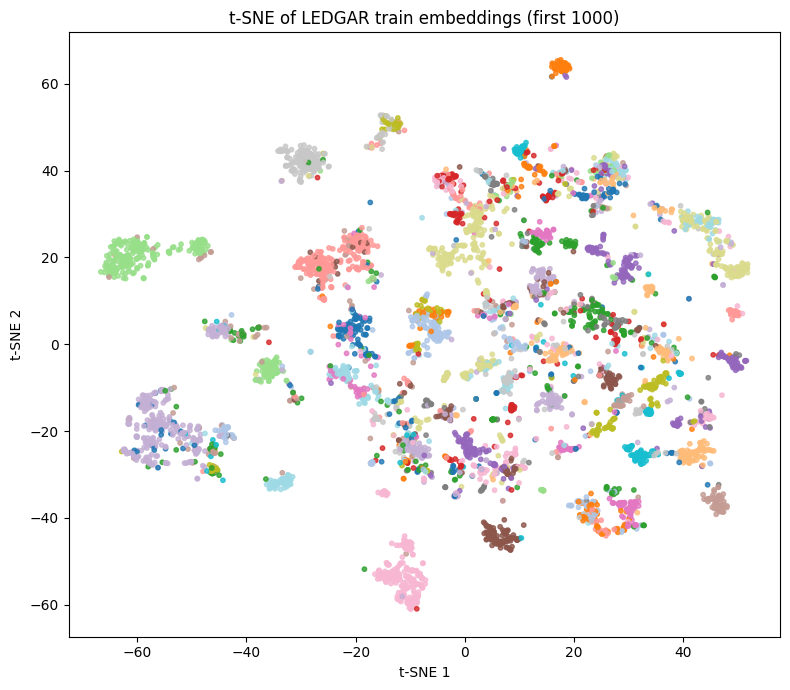

In [ ]:
import os
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from pgvector.psycopg2 import register_vector
from dotenv import load_dotenv
print(load_dotenv("../.env"))
print(load_dotenv("../secrets.env"))

PG_HOST = os.getenv("DB_HOST", "127.0.0.1")
PG_PORT = "5433"
PG_DB   = os.getenv("DB_NAME", "lextral-db")
PG_USER = os.getenv("DB_USER", "postgres")
PG_PASS = os.getenv("DB_PASSWORD", "")

print(f"Connecting to PostgreSQL at {PG_HOST}:{PG_PORT}/{PG_DB} as {PG_USER}")
conn = psycopg2.connect(
    host=PG_HOST, port=PG_PORT, dbname=PG_DB, user=PG_USER, password=PG_PASS
)
register_vector(conn)

query = """
SELECT id, label_id, label_text, text, embedding
FROM clause_embeddings
WHERE split = 'train'
ORDER BY id
LIMIT 6000;
"""

with conn.cursor() as cur:
    cur.execute(query)
    rows = cur.fetchall()

conn.close()

# rows[i] = (id, label_id, label_text, text, embedding)
ids        = [r[0] for r in rows]
label_ids  = np.array([r[1] for r in rows], dtype=int)
label_text = [r[2] for r in rows]
texts      = [r[3] for r in rows]

X = np.vstack([np.array(r[4], dtype=np.float32) for r in rows])  # (N, 1024)

print(f"Loaded embeddings: {X.shape}")

pca_n = min(50, X.shape[1])
X_pca = PCA(n_components=pca_n, random_state=42).fit_transform(X)

tsne = TSNE(
    n_components=2,
    perplexity=50,              # 5–50 ok pour N=1000
    metric="cosine",
    init="pca",
    learning_rate="auto",
    n_iter_without_progress=2000,
    random_state=42,
    verbose=1,
)
Y = tsne.fit_transform(X_pca)   # (N, 2)

plt.figure(figsize=(8, 7))
sc = plt.scatter(Y[:, 0], Y[:, 1], c=label_ids, cmap="tab20", s=10, alpha=0.8)
plt.title("t-SNE of LEDGAR train embeddings (first 1000)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.savefig("../images/tsne_ledgar_train_6k.png", dpi=300)
plt.show()


In [6]:
import json
from sklearn.metrics import classification_report

files = ["../data/evaluations/ministral-3b-latest_rag_1000.json", "../data/evaluations/ministral-3b-latest_rag_1000bis.json"]

y_true_all = []
y_pred_all = []

for file in files:
    with open(file, "r") as f:
        data = json.load(f)
        y_true_all.extend(data["y_true"])
        y_pred_all.extend(data["y_pred"])

print(classification_report(y_true_all, y_pred_all))


ValueError: Found input variables with inconsistent numbers of samples: [1000, 999]

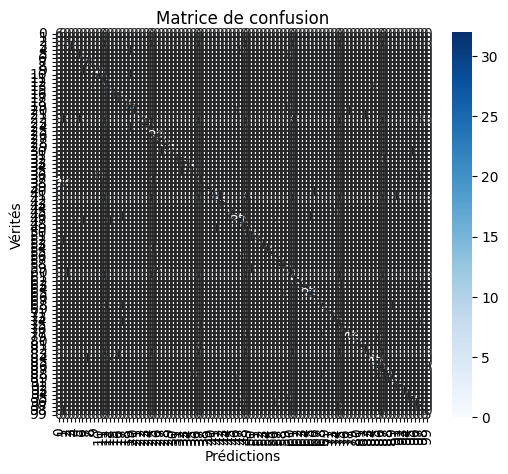

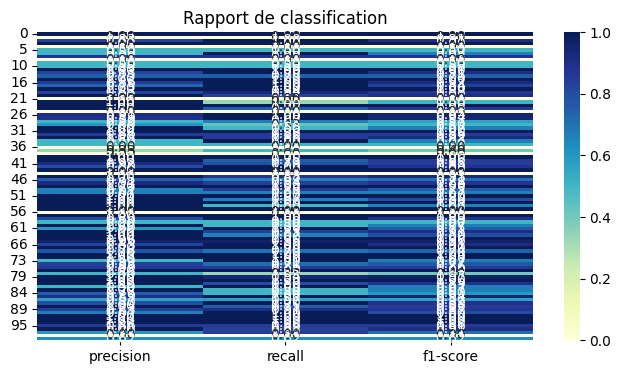

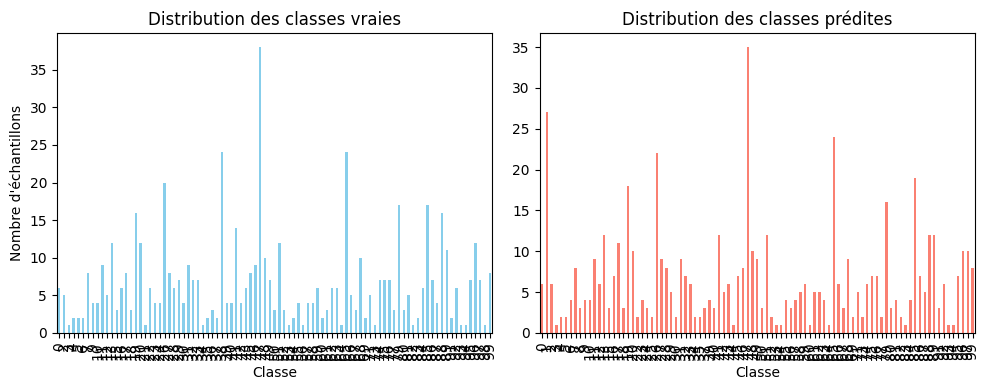

In [7]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# ----------------------
# 1. Charger le JSON
# ----------------------
# Si ton fichier s'appelle result.json
with open("../data/evaluations/ministral-3b-latest_rag_1000bis.json", "r") as f:
    data = json.load(f)

y_true = data["y_true"]
y_pred = data["y_pred"]

# ----------------------
# 2. Matrice de confusion
# ----------------------
labels = sorted(set(y_true) | set(y_pred))
cm = confusion_matrix(y_true, y_pred, labels=labels)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title("Matrice de confusion")
plt.show()

# ----------------------
# 3. Rapport de classification (tableau pandas pour lisibilité)
# ----------------------
report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(df_report.iloc[:-3, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Rapport de classification")
plt.show()

# ----------------------
# 4. Répartition des classes
# ----------------------
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

pd.Series(y_true).value_counts().sort_index().plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title("Distribution des classes vraies")
ax[0].set_xlabel("Classe")
ax[0].set_ylabel("Nombre d'échantillons")

pd.Series(y_pred).value_counts().sort_index().plot(kind='bar', ax=ax[1], color='salmon')
ax[1].set_title("Distribution des classes prédites")
ax[1].set_xlabel("Classe")

plt.tight_layout()
plt.show()


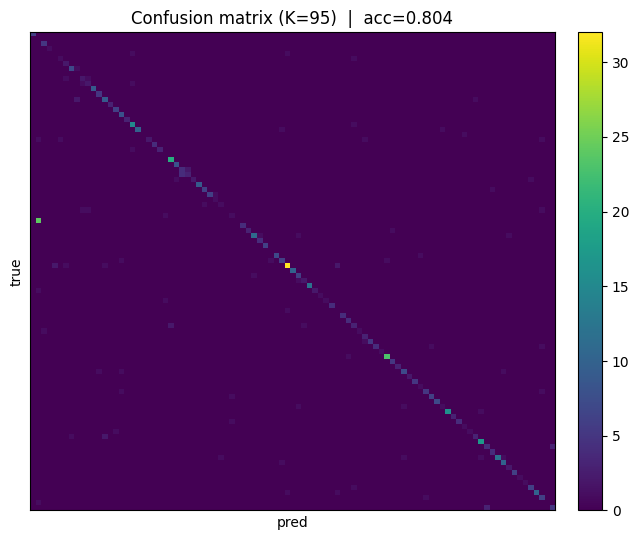

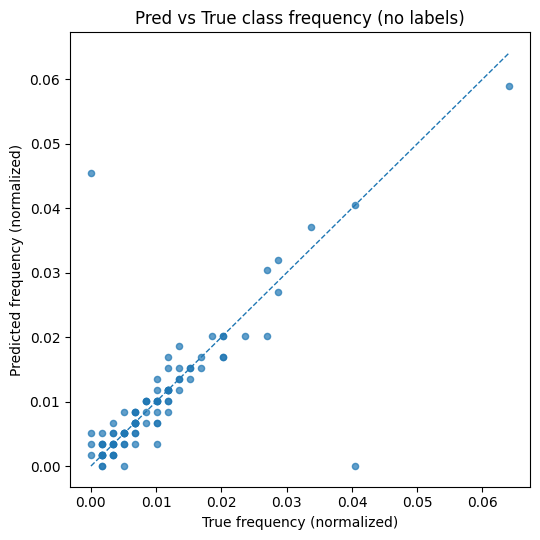

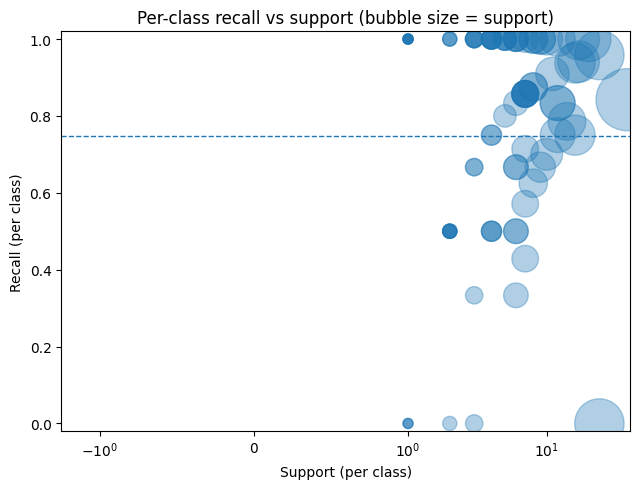

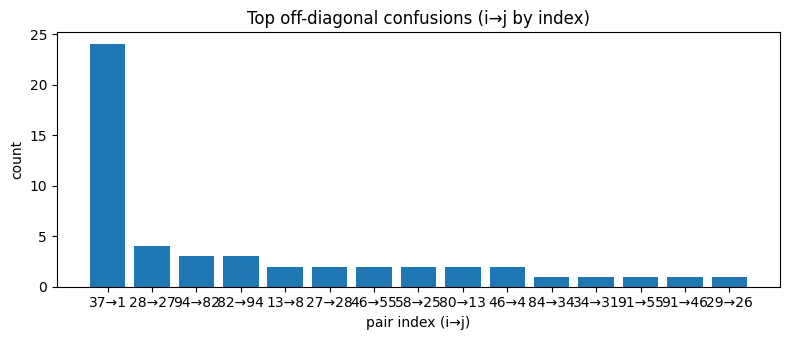

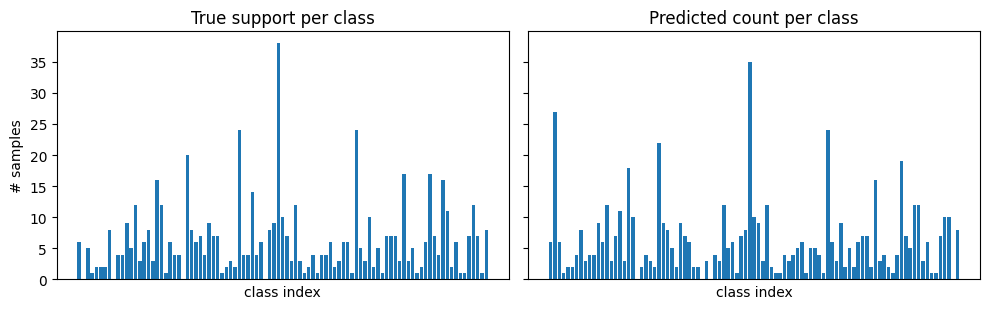

Samples   : 593
Classes   : 95
Accuracy  : 0.804
Macro recall: 0.748 | Macro precision: 0.755 | Macro F1: 0.738


In [8]:
# %% [markdown]
# Visualisation compacte pour un problème à ~100 classes
# - Pas de noms de classes réécrits (xticks/yticks masqués)
# - Visuels: matrice de confusion, fréquences vraies vs prédites, rappel par classe vs support,
#            et top confusions (en barres compactes)
# - Entrée: un JSON {"y_true": [...], "y_pred": [...]}

# %%
import json
import math
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# ---------- 1) Charger le JSON ----------
JSON_PATH = "../data/evaluations/ministral-3b-latest_rag_1000bis.json"  # <- change si besoin
with open(JSON_PATH, "r") as f:
    data = json.load(f)

y_true = np.array(data["y_true"])
y_pred = np.array(data["y_pred"])

# Labels présents (conserve l’ordre numérique)
labels = np.array(sorted(set(y_true.tolist()) | set(y_pred.tolist())))
label_to_idx = {lab: i for i, lab in enumerate(labels)}

# Remap en indices compacts [0..K-1] pour les visuels
y_true_idx = np.array([label_to_idx[v] for v in y_true])
y_pred_idx = np.array([label_to_idx[v] for v in y_pred])
K = len(labels)

# ---------- 2) Matrices & métriques ----------
cm = confusion_matrix(y_true_idx, y_pred_idx, labels=np.arange(K))
support = cm.sum(axis=1)              # par classe (réel)
pred_freq = cm.sum(axis=0)            # fréquence prédite par classe
tp = np.diag(cm)
with np.errstate(divide='ignore', invalid='ignore'):
    recall = np.where(support > 0, tp / support, 0.0)   # "accuracy par classe" côté vrai
    precision = np.where(pred_freq > 0, tp / pred_freq, 0.0)
    f1 = np.where((precision + recall) > 0, 2 * precision * recall / (precision + recall), 0.0)

accuracy = (y_true_idx == y_pred_idx).mean()

# ---------- 3) Matrice de confusion (sans étiquettes) ----------
plt.figure(figsize=(6.5, 5.5))
im = plt.imshow(cm, interpolation="nearest", aspect="auto")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title(f"Confusion matrix (K={K})  |  acc={accuracy:.3f}")
plt.xlabel("pred")
plt.ylabel("true")
# Masquer ticks et labels
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

# ---------- 4) Fréquences vraies vs prédites ----------
true_freq_norm = support / support.sum() if support.sum() else support
pred_freq_norm = pred_freq / pred_freq.sum() if pred_freq.sum() else pred_freq

plt.figure(figsize=(5.5, 5.5))
plt.scatter(true_freq_norm, pred_freq_norm, s=20, alpha=0.7)
maxv = float(max(true_freq_norm.max(), pred_freq_norm.max(), 1e-6))
plt.plot([0, maxv], [0, maxv], linestyle="--", linewidth=1)
plt.xlabel("True frequency (normalized)")
plt.ylabel("Predicted frequency (normalized)")
plt.title("Pred vs True class frequency (no labels)")
plt.tight_layout()
plt.show()

# ---------- 5) Rappel par classe vs support (bulles, sans labels) ----------
sizes = 2000 * (support / support.max() if support.max() > 0 else support)  # taille ~ support
plt.figure(figsize=(6.5, 5.0))
plt.scatter(support, recall, s=sizes, alpha=0.35)
plt.axhline(recall.mean(), linestyle="--", linewidth=1)
plt.xlabel("Support (per class)")
plt.ylabel("Recall (per class)")
plt.title("Per-class recall vs support (bubble size = support)")
plt.xscale("symlog", linthresh=1)   # lisible si classes rares/abondantes
plt.ylim(-0.02, 1.02)
plt.tight_layout()
plt.show()

# ---------- 6) Top confusions (hors diagonale) ----------
# On extrait les paires (i != j) avec plus gros compte
cm_offdiag = cm.copy()
np.fill_diagonal(cm_offdiag, 0)
pairs = np.argwhere(cm_offdiag > 0)
values = cm_offdiag[cm_offdiag > 0]

if values.size > 0:
    top_n = 15  # ajuste si tu veux
    order = np.argsort(values)[::-1][:top_n]
    top_pairs = pairs[order]
    top_vals = values[order]

    # On les représente comme barres "i→j" via indices compacts (pas de label texte long)
    x = np.arange(len(top_vals))
    plt.figure(figsize=(8, 3.5))
    plt.bar(x, top_vals)
    plt.title("Top off-diagonal confusions (i→j by index)")
    plt.xlabel("pair index (i→j)")
    plt.ylabel("count")
    # Ticks minimalistes (ex: '12→7'), mais courts et compacts
    tick_text = [f"{int(i)}→{int(j)}" for i, j in top_pairs]
    # Pour limiter le texte, on peut n'afficher qu'un tick sur 2 si ça déborde
    step = max(1, len(x)//12)
    plt.xticks(x[::step], [tick_text[k] for k in range(0, len(tick_text), step)], rotation=0)
    plt.tight_layout()
    plt.show()

# ---------- 7) Histogrammes de distribution (option compact) ----------
# On évite 100 ticks : on montre juste les barres sans xticks.
fig, ax = plt.subplots(1, 2, figsize=(10, 3.2), sharey=True)
ax[0].bar(np.arange(K), support)
ax[0].set_title("True support per class")
ax[0].set_xlabel("class index")
ax[0].set_ylabel("# samples")
ax[0].set_xticks([])

ax[1].bar(np.arange(K), pred_freq)
ax[1].set_title("Predicted count per class")
ax[1].set_xlabel("class index")
ax[1].set_xticks([])

plt.tight_layout()
plt.show()

# ---------- 8) Récap global (texte court) ----------
print(f"Samples   : {len(y_true)}")
print(f"Classes   : {K}")
print(f"Accuracy  : {accuracy:.3f}")
print(f"Macro recall: {np.mean(recall):.3f} | Macro precision: {np.mean(precision):.3f} | Macro F1: {np.mean(f1):.3f}")


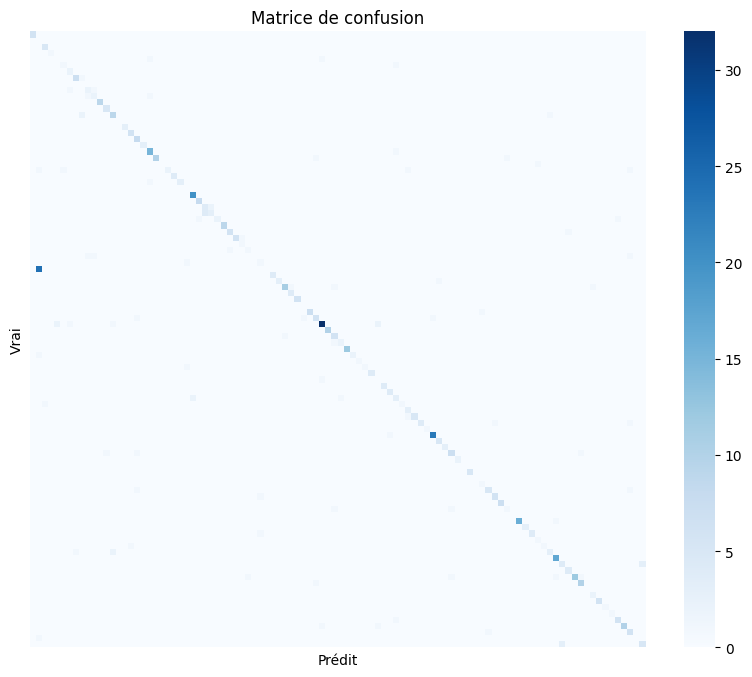

In [9]:
import json
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Charger les données depuis un fichier
with open("../data/evaluations/ministral-3b-latest_rag_1000bis.json", "r") as f:
    data = json.load(f)

y_true = data["y_true"]
y_pred = data["y_pred"]

# Calcul de la matrice de confusion (100 classes)
cm = confusion_matrix(y_true, y_pred, labels=list(range(100)))

# Affichage graphique sans noms de labels
plt.figure(figsize=(10, 8))
sns.heatmap(cm, cmap="Blues", cbar=True, square=True, xticklabels=False, yticklabels=False)
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.title("Matrice de confusion")
plt.show()
